<h3>En este notebook se continua el trabajo descrito en la parte 1 tomando los datos que fueron procesados anteriormente.
<BR>Para esto, se ha definido previamente una lista de palabras vacías en español que serán de utilidad para el análisis de los tweets</h3>

In [6]:
STOPWORDS = {'a', 'actualmente', 'adelante', 'además', 'afirmó', 'agregó', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algún', 'alrededor', 'ambos', 'ampleamos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquellas', 'aquellos', 'aqui', 'aquí', 'arriba', 'aseguró', 'así', 'atras', 'aunque', 'ayer', 'añadió', 'aún', 'bajo', 'bastante', 'bien', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'comentó', 'como', 'co', 'con', 'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanto', 'cuatro', 'cuenta', 'cómo', 'da', 'dado', 'dan', 'dar', 'de', 'debe', 'deben', 'debido', 'decir', 'dejó', 'del', 'demás', 'dentro', 'desde', 'después', 'dice', 'dicen', 'dicho', 'dieron', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'donde', 'dos', 'durante', 'e', 'ejemplo', 'el', 'él', 'ella', 'ellas', 'ello', 'ellos', 'embargo', 'empleais', 'emplean', 'emplear', 'empleas', 'empleo', 'en', 'encima', 'encuentra', 'entonces', 'entre', 'era', 'erais', 'eramos', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estais', 'estamos', 'estan', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'ex', 'existe', 'existen', 'explicó', 'expresó', 'fin', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses', 'fui', 'fuimos', 'fuiste', 'fuisteis', 'fuéramos', 'fuésemos', 'gran', 'grandes', 'gueno', 'ha', 'haber', 'habida', 'habidas', 'habido', 'habidos', 'habiendo', 'habremos', 'habrá', 'habrán', 'habrás', 'habré', 'habréis', 'habría', 'habríais', 'habríamos', 'habrían', 'habrías', 'habéis', 'había', 'habíais', 'habíamos', 'habían', 'habías', 'hace', 'haceis', 'hacemos', 'hacen', 'hacer', 'hacerlo', 'haces', 'hacia', 'haciendo', 'hago', 'han', 'has', 'hasta', 'hay', 'haya', 'hayamos', 'hayan', 'hayas', 'hayáis', 'he', 'hecho', 'hemos', 'hicieron', 'hizo', 'hoy', 'https', 'hube', 'hubiera', 'hubierais', 'hubieran', 'hubieras', 'hubieron', 'hubiese', 'hubieseis', 'hubiesen', 'hubieses', 'hubimos', 'hubiste', 'hubisteis', 'hubiéramos', 'hubiésemos', 'hubo', 'igual', 'incluso', 'indicó', 'informó', 'intenta', 'intentais', 'intentamos', 'intentan', 'intentar', 'intentas', 'intento', 'ir', 'junto', 'la', 'lado', 'largo', 'las', 'le', 'les', 'llegó', 'lleva', 'llevar', 'lo', 'los', 'luego', 'lugar', 'manera', 'manifestó', 'mayor', 'me', 'mediante', 'mejor', 'mencionó', 'menos', 'mi', 'mientras', 'mio', 'mis', 'misma', 'mismas', 'mismo', 'mismos', 'modo', 'momento', 'mucha', 'muchas', 'mucho', 'muchos', 'muy', 'más', 'mí', 'mía', 'mías', 'mío', 'míos', 'nada', 'nadie', 'ni', 'ninguna', 'ningunas', 'ninguno', 'ningunos', 'ningún', 'no', 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', 'nueva', 'nuevas', 'nuevo', 'nuevos', 'nunca', 'o', 'ocho', 'os', 'otra', 'otras', 'otro', 'otros', 'para', 'parece', 'parte', 'partir', 'pasada', 'pasado', 'pero', 'pesar', 'poca', 'pocas', 'poco', 'pocos', 'podeis', 'podemos', 'poder', 'podria', 'podriais', 'podriamos', 'podrian', 'podrias', 'podrá', 'podrán', 'podría', 'podrían', 'poner', 'por', 'por qué', 'porque', 'posible', 'primer', 'primera', 'primero', 'primeros', 'principalmente', 'propia', 'propias', 'propio', 'propios', 'próximo', 'próximos', 'pudo', 'pueda', 'puede', 'pueden', 'puedo', 'pues', 'que', 'quedó', 'queremos', 'quien', 'quienes', 'quiere', 'quién', 'qué', 'realizado', 'realizar', 'realizó', 'respecto', 'sabe', 'sabeis', 'sabemos', 'saben', 'saber', 'sabes', 'se', 'sea', 'seamos', 'sean', 'seas', 'segunda', 'segundo', 'según', 'seis', 'ser', 'seremos', 'será', 'serán', 'serás', 'seré', 'seréis', 'sería', 'seríais', 'seríamos', 'serían', 'serías', 'seáis', 'señaló', 'si', 'sido', 'siempre', 'siendo', 'siete', 'sigue', 'siguiente', 'sin', 'sino', 'sobre', 'sois', 'sola', 'solamente', 'solas', 'solo', 'solos', 'somos', 'son', 'soy', 'su', 'sus', 'suya', 'suyas', 'suyo', 'suyos', 'sí', 'sólo', 'tal', 'también', 'tampoco', 'tan', 'tanto', 'te', 'tendremos', 'tendrá', 'tendrán', 'tendrás', 'tendré', 'tendréis', 'tendría', 'tendríais', 'tendríamos', 'tendrían', 'tendrías', 'tened', 'teneis', 'tenemos', 'tener', 'tenga', 'tengamos', 'tengan', 'tengas', 'tengo', 'tengáis', 'tenida', 'tenidas', 'tenido', 'tenidos', 'teniendo', 'tenéis', 'tenía', 'teníais', 'teníamos', 'tenían', 'tenías', 'tercera', 'ti', 'tiempo', 'tiene', 'tienen', 'tienes', 'toda', 'todas', 'todavía', 'todo', 'todos', 'total', 'trabaja', 'trabajais', 'trabajamos', 'trabajan', 'trabajar', 'trabajas', 'trabajo', 'tras', 'trata', 'través', 'tres', 'tu', 'tus', 'tuve', 'tuviera', 'tuvierais', 'tuvieran', 'tuvieras', 'tuvieron', 'tuviese', 'tuvieseis', 'tuviesen', 'tuvieses', 'tuvimos', 'tuviste', 'tuvisteis', 'tuviéramos', 'tuviésemos', 'tuvo', 'tuya', 'tuyas', 'tuyo', 'tuyos', 'tú', 'ultimo', 'un', 'una', 'unas', 'uno', 'unos', 'usa', 'usais', 'usamos', 'usan', 'usar', 'usas', 'uso', 'usted', 'va', 'vais', 'valor', 'vamos', 'van', 'varias', 'varios', 'vaya', 'veces', 'ver', 'verdad', 'verdadera', 'verdadero', 'vez', 'vosotras', 'vosotros', 'voy', 'vuestra', 'vuestras', 'vuestro', 'vuestros', 'y', 'ya', 'yo', 'él', 'éramos', 'ésta', 'éstas', 'éste', 'éstos', 'última', 'últimas', 'último', 'últimos'}

import pyLDAvis
import pyLDAvis.sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import string, re, sklearn, pandas as pd, numpy as np
from wordcloud import WordCloud
from subprocess import check_output
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

ruta = 'Tweets 4LDA reduced.csv'
%matplotlib inline

C:\Users\jose.jimenez\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df = pd.read_csv(ruta, header=0)
df.head()

C:\Users\jose.jimenez\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Fecha,tweets_lemma
0,2020-02-28,coronavirus en mexico 🇲 🇽 confirmado caso d...
1,2020-02-28,él tener el segundo caso confiado de covid e...
2,2020-02-28,mensaje de el jefa de gobierno sobre el coro...
3,2020-02-28,pero ya estar presto a vender cualquiera c...
4,2020-02-28,nohaycubreboca animal de lopezobrador elcac...


<h3>Se comienza por realizar un análisis exploratorio de los tweets presentando un histograma de la longitud de los tweets.
<BR>También se presenta una nube de palabras para identificar los términos más citados en los dos años de datos recolectados
</h3>

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


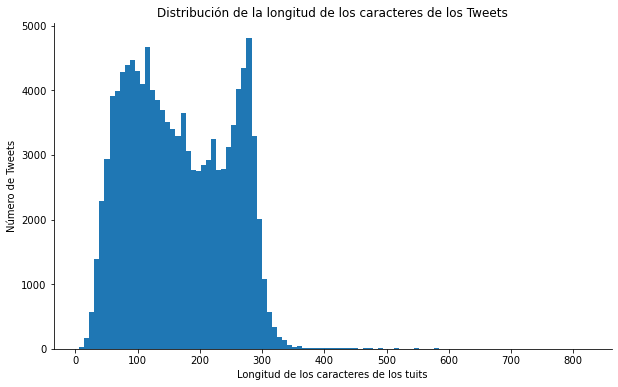

In [7]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df.tweets_lemma]
plt.hist(doc_lens, bins = 100)
plt.title('Distribución de la longitud de los caracteres de los Tweets')
plt.ylabel('Número de Tweets')
plt.xlabel('Longitud de los caracteres de los tuits')
sns.despine();

In [7]:
plt.rcParams['figure.figsize']=(12.0,12.0)  
plt.rcParams['font.size']=12            
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

C:\Users\jose.jimenez\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


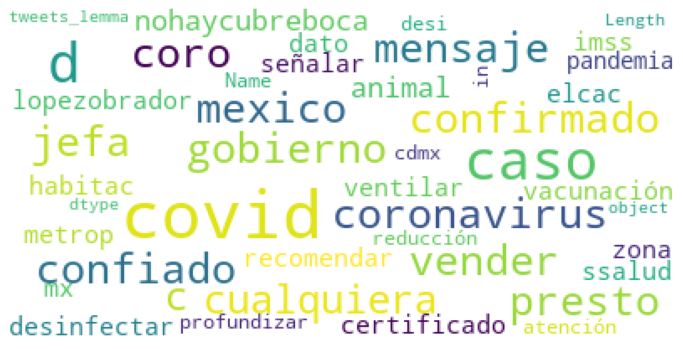

In [9]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=100
                         ).generate(str(df.tweets_lemma))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

<h3>Se continúa el análisis mediante el despliegue de los conjuntos de palabras que más se presentan en el corpus, haciendo conteo para una, dos y tres palabras</h3>

In [8]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df.tweets_lemma, 10)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
unigram

C:\Users\jose.jimenez\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unigram,count
0,covid,31060
1,vacuna,18195
2,lopezobrador,17824
3,pandemia,17661
4,cubrebocar,9217
5,méxico,8374
6,vacunación,7935
7,día,7238
8,año,6635
9,coronavirus,6555


In [9]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df.tweets_lemma, 10)
bigram = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
bigram

C:\Users\jose.jimenez\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,bigram,count
0,sano distancia,4334
1,vacuna covid,1807
2,vía eluniversal,1714
3,ssalud mx,1629
4,dosis vacuna,1279
5,prueba covid,1022
6,mexico city,947
7,pandemia covid,880
8,city mexico,865
9,universal mx,840


In [11]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3), stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df.tweets_lemma, 10)
trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
trigram

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,trigram,count
0,mexico city mexico,864
1,caso activo estimado,257
2,defunción caso activo,253
3,caso defunción caso,250
4,activo estimado persona,250
5,estimado persona recuperado,250
6,sano distancia cubrebocar,238
7,respetar sano distancia,236
8,cifra méxico caso,236
9,méxico caso defunción,236


In [10]:
vectorizer = CountVectorizer(analyzer='word', min_df=3, stop_words=stopwords, lowercase=True, 
                             token_pattern='[a-zA-Z0-9]{3,}', max_features=5000)
data_matrix = vectorizer.fit_transform(df.tweets_lemma)
data_matrix

C:\Users\jose.jimenez\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\jose.jimenez\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['adem', 'adi', 'afirm', 'agreg', 'ais', 'alg', 'amos', 'aqu', 'asegur', 'bamos', 'coment', 'consider', 'dej', 'dem', 'despu', 'est', 'estuvi', 'explic', 'expres', 'hab', 'habr', 'hubi', 'indic', 'inform', 'lleg', 'ltima', 'ltimas', 'ltimo', 'ltimos', 'manifest', 'mencion', 'ning', 'podr', 'qued', 'qui', 'ramos', 'realiz', 'seg', 'semos', 'sta', 'stas', 'ste', 'stos', 'tambi', 'ten', 'tendr', 'teng', 'todav', 'trav', 'tuvi',

<117670x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1076769 stored elements in Compressed Sparse Row format>

In [11]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=20, n_jobs = -1)
lda_output = lda_model.fit_transform(data_matrix)

C:\Users\jose.jimenez\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h3>Se realiza un análisis extenso de los tópicos que más se discuten en el corpus, en este caso se ha establecido en 10 el número de tópicos que se desea explorar.
<BR>Para aprovechar el componente que se presenta en esta sección, se recomienda buscar información sobre como usar la librería pyLDAvis ya que se enfoca precisamente en el análisis de tópicos y las características que permiten relacionar palabras dentro de los mismos tópicos
</h3>

In [12]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

C:\Users\jose.jimenez\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\jose.jimenez\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4      32.420952   8.115230       1        1  13.498549
6       0.648955  71.707100       2        1  12.040520
5      71.019684   9.971006       3        1  10.489063
2       3.785981  33.185135       4        1   9.915897
8     -42.666500  -9.222070       5        1   9.890073
3      -3.621689 -43.526516       6        1   9.468087
9      -3.632402  -4.171708       7        1   8.888684
0     -36.584400  35.804413       8        1   8.750502
1      44.391380  50.615383       9        1   8.547894
7      40.235809 -31.591665      10        1   8.510731, topic_info=              Term          Freq         Total Category  logprob  loglift
4798        vacuna  19307.000000  19307.000000  Default  30.0000  30.0000
2814  lopezobrador  18445.000000  18445.000000  Default  29.0000  29.0000
3443      pandemia  17300.000000  17300.000000  Default  28.0000  28.0000
4800      vacunaci   9780.000000   9780.000000  Default  27.0000  27.0000
1223    cubrebocar   9024.000000   9024.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1165         covid   3412.056503  29973.604602  Topic10  -3.3290   0.2908
3906        querer   1154.675111   4935.288462  Topic10  -4.4125   1.0113
4618      terminar    742.814431   1289.523612  Topic10  -4.8537   1.9123
1133   coronavirus    876.458731   4267.710440  Topic10  -4.6882   0.8809
3853        prueba    846.372375   3426.865780  Topic10  -4.7232   1.0654

[431 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
12        4  0.998003   abrazo
15        8  0.999051    abrir
26        3  0.999274   acabar
40        8  0.998932  aceptar
55        3  0.999188   activo
...     ...       ...      ...
4943      3  0.998498    votar
4965      1  0.178615     xico
4965      2  0.270383     xico
4965      9  0.101379     xico
4965     10  0.449456     xico

[481 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 6, 3, 9, 4, 10, 1, 2, 8])

<h4>Por último, se realiza un recorrido por las 10 palabras que más se presentan por cada tópico</h4>

In [15]:
for i,topic in enumerate(lda_model.components_):
    print(f'Top 10 palabras para el tópico #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 palabras para el tópico #0:
['pendejo', 'morir', 'evitar', 'querer', 'persona', 'deber', 'contagio', 'sano', 'distancia', 'cubrebocar']
Top 10 palabras para el tópico #1:
['gobierno', 'riesgo', 'xico', 'hijo', 'amigo', 'peor', 'quedar', 'cubrebocar', 'casa', 'amlo']
Top 10 palabras para el tópico #2:
['sentir', 'vivir', 'mill', 'persona', 'pfizer', 'aplicar', 'covid', 'claudiashein', 'dosis', 'vacuna']
Top 10 palabras para el tópico #3:
['usacubreboca', 'importante', 'entender', 'gracias', 'muerto', 'dico', 'medida', 'covid', 'cubreboca', 'salir']
Top 10 palabras para el tópico #4:
['cubrebocar', 'hora', 'pedir', 'gente', 'mal', 'creer', 'presidente', 'seguir', 'pandemia', 'lopezobrador']
Top 10 palabras para el tópico #5:
['foro', 'llegar', 'cosa', 'dejar', 'gracia', 'semana', 'cuidar', 'covid', 'pasar', 'pandemia']
Top 10 palabras para el tópico #6:
['tambi', 'caso', 'muerte', 'salud', 'prueba', 'mil', 'gobierno', 'pandemia', 'xico', 'covid']
Top 10 palabras para el tópico #7: